

The set-up
==========
* The data points are uniformly distributed in [0,100]
* The feature-effect is made from 10 piece-wise linear parts of length 10;

For different values of parameters:
* N: nof points
* noise_level: how much noise to add in the data_effect estimation

Questions to be addressed
=========================
For fixed-size bins:
* what is the best K in terms of accuracy?
* Does standard mse_fixed_size or variance estimator chooses the best K?
For variable-sized bins:
* what is the best (a) number and (b) size of bins, in terms of mse_fixed_size?
* does dynamic programming based on mse_fixed_size finds them and for which K?
* does dynamic programming based on standard mse_fixed_size finds them and for which K?

Final Goals
===========
* show that choosing the correct bin-size K is crucial
* in cases of uniformly distributed data, choosing a big K is always a good option - or even the best option
 (independently of noise level and nof points)
* show that variable-size bins, has equivalent accuracy with fixed-bin in case of fixed-size piecewise linear effect
 and our algorithm is able to find variable-sizes with equivalent accuracy in this case
* show that standard mse_fixed_size is a good estimator of the best bin size

Experiments
===========

(a) For noise_level = 0
=======================
For fixed-size bins:
* The best K are the ones that permit changing bin every 10
i.e. K = {10, 20, 30, ..., 100} or dx = {10, 10/2=5 ,10/3=3.33, ... , 10/10=1}
* but in the range of big K, all choices have good accuracy
* Standard mse_fixed_size perfectly chooses the best candidates
For Variable-size bins:
* Finds good bins based on accuracy
* Finds good bins base on standard mse_fixed_size


The conclusions above, hold independently of the number of points. In case of limited points, variable-size bins can be
"wrong" but this is due to the absence of points, not a problem of the method.


(b) For noise_level = 3.0
=======================
For fixed-size bins:
* The best K are the ones that permit changing bin every 10
i.e. K = {10, 20, 30, ..., 100} or dx = {10, 10/2=5 ,10/3=3.33, ... , 10/10=1}
* but in the range of big K, all choices have good accuracy
* Standard mse_fixed_size perfectly chooses the best candidates
For Variable-size bins:
* Finds good bins based on accuracy
* Finds good bins base on standard mse_fixed_size

In [1]:
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
import examples.example_utils as utils
import feature_effect as fe
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
def f_params():
    def find_a(params, x_start):
        params[0]["a"] = x_start
        for i, param in enumerate(params):
            if i < len(params) - 1:
                a_next = param["a"] + (param["to"] - param["from"]) * param["b"]
                params[i + 1]["a"] = a_next

    params = [{"b":0.3, "from": 0., "to": 10.},
              {"b":7., "from": 10, "to": 20},
              {"b":-1.5, "from": 20, "to": 30},
              {"b":0., "from": 30, "to": 40},
              {"b":-5., "from": 40, "to": 50},
              {"b":0.3, "from": 50, "to": 60},
              {"b":7., "from": 60, "to": 70},
              {"b":-1.5, "from": 70, "to": 80},
              {"b":0., "from": 80, "to": 90},
              {"b":-5., "from": 90, "to": 100}]
    x_start = -1
    find_a(params, x_start)
    return params


def generate_samples(N):
    eps = 1e-05
    x = np.random.uniform(0, 100-eps, size=int(N))
    x = np.expand_dims(np.concatenate((np.array([0.0]), x, np.array([100. - eps]))), axis=-1)
    return x


In [41]:
N = 100
noise_level = 1
K_max_fixed = 50
K_max_variable = 40

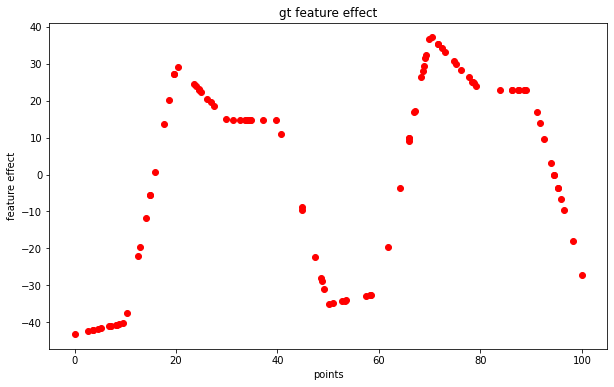

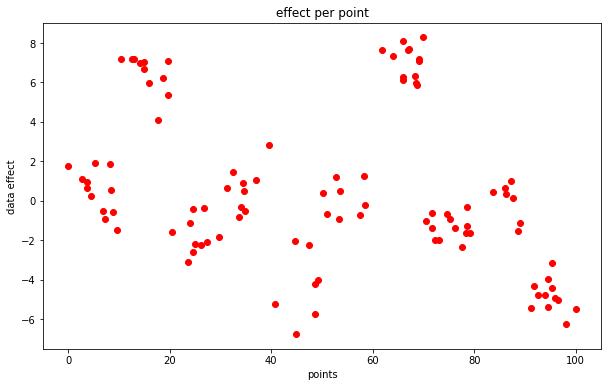

In [42]:
# init functions
seed = 4834545
np.random.seed(seed)

f1_center = utils.create_f1_center(f_params)
f1 = utils.create_f1(f_params)
f1_jac = utils.create_data_effect(f_params, noise_level, seed)
x = generate_samples(N=N)
y = f1_center(x)
data = x
data_effect = f1_jac(x)

# show gt effect
utils.plot_gt_effect(data, y)

# show data effect
utils.plot_data_effect(data, data_effect)

In [43]:
# solve for fixed and variable size
fixed_params = utils.count_loss_mse_fixed(K_max_fixed, f1_center, data, f1, f1_jac)
k_list_fixed, mse_fixed_size, loss_fixed_size, dale_list_fixed = fixed_params

variable_params = utils.count_loss_mse_variable(K_max_variable, f1_center, data, f1, f1_jac)
k_list_variable, mse_variable_size, loss_variable_size, dale_list_variable = variable_params

In [44]:
best_fixed_index = np.nanargmin(loss_fixed_size)
print("===========================================")
print("Best K is: %2d, with loss=%.3f" % (best_fixed_index+2, loss_fixed_size[best_fixed_index]))

print("===========================================")
print("Dx is: %.3f" %(dale_list_fixed[best_fixed_index].parameters["feature_0"]["dx"]))

print("===========================================")
print("Effect per bin is:")
print(dale_list_fixed[best_fixed_index].parameters["feature_0"]["bin_effect"])

print("===========================================")
print("Loss per K:")
for i, k in enumerate(k_list_fixed):
    print("Fixed-size k= %d, loss=%.3f" % (k, loss_fixed_size[i]))



Best K is: 10, with loss=95.632
Dx is: 10.000
Effect per bin is:
[ 0.46451562  6.45363526 -1.75195499  0.63863236 -4.32441434  0.09989753
  7.03811603 -1.32711654 -0.01282064 -4.82962525]
Loss per K:
Fixed-size k= 2, loss=1592.075
Fixed-size k= 3, loss=1503.504
Fixed-size k= 4, loss=973.298
Fixed-size k= 5, loss=856.654
Fixed-size k= 6, loss=1068.230
Fixed-size k= 7, loss=740.455
Fixed-size k= 8, loss=707.437
Fixed-size k= 9, loss=622.805
Fixed-size k= 10, loss=95.632
Fixed-size k= 11, loss=612.580
Fixed-size k= 12, loss=565.698
Fixed-size k= 13, loss=450.563
Fixed-size k= 14, loss=469.541
Fixed-size k= 15, loss=353.620
Fixed-size k= 16, loss=485.648
Fixed-size k= 17, loss=315.957
Fixed-size k= 18, loss=333.236
Fixed-size k= 19, loss=391.690
Fixed-size k= 20, loss=nan
Fixed-size k= 21, loss=nan
Fixed-size k= 22, loss=nan
Fixed-size k= 23, loss=nan
Fixed-size k= 24, loss=nan
Fixed-size k= 25, loss=nan
Fixed-size k= 26, loss=nan
Fixed-size k= 27, loss=nan
Fixed-size k= 28, loss=nan
Fixed

In [45]:
best_variable_index = np.nanargmin(loss_variable_size)
print("===========================================")
print("Best K is: %2d, with loss=%.3f" % (best_variable_index+2, loss_variable_size[best_variable_index]))

print("===========================================")
print("Bin limits are:")
print(dale_list_fixed[best_variable_index].parameters["feature_0"]["limits"])

print("===========================================")
print("Effect per bin is:")
print(dale_list_fixed[best_variable_index].parameters["feature_0"]["bin_effect"])

print("===========================================")
print("Loss per K:")
for i, k in enumerate(k_list_variable):
    print("Fixed-size k= %d, loss=%.3f" % (k, loss_variable_size[i]))

Best K is: 30, with loss=69.249
Bin limits are:
[ 0.          3.333333    6.666666    9.999999   13.333332   16.666665
 19.999998   23.333331   26.666664   29.999997   33.33333    36.666663
 39.999996   43.333329   46.666662   49.999995   53.333328   56.666661
 59.999994   63.333327   66.66666    69.999993   73.333326   76.666659
 79.999992   83.333325   86.666658   89.999991   93.333324   96.666657
 99.99999002]
Effect per bin is:
[ 1.43510353  0.94029232 -0.17619815  7.20108839  6.65686675  5.68981394
 -1.57343644 -1.9448338  -1.42570355  1.05070597 -0.04864793  1.94475947
 -5.25807749 -4.39695639 -4.05472753  0.31637973 -0.23120944  0.10415332
  7.62757136  6.95075961  7.00811233 -1.40576923 -1.00581275 -1.44124613
 -0.48894426  0.4633576  -0.36995432 -4.85173953 -4.51891186 -5.88395069]
Loss per K:
Fixed-size k= 2, loss=1592.075
Fixed-size k= 3, loss=1503.504
Fixed-size k= 4, loss=973.298
Fixed-size k= 5, loss=856.654
Fixed-size k= 6, loss=1068.230
Fixed-size k= 7, loss=740.455
Fix

In [50]:
dale = fe.DALE(data=data, model=f1, model_jac=f1_jac)
def plot(bins):
    dale.fit(features=[0], k=bins)
    dale.plot(s=0, block=False, gt=f1_center, gt_bins=utils.create_gt_bins(f_params))
    plt.show()

dale_plot = widgets.interactive(plot, bins=(1, 66, 1))
dale_output = dale_plot.children[-1]
dale_output.layout.height = '400px'
dale_plot

interactive(children=(IntSlider(value=33, description='bins', max=66, min=1), Output(layout=Layout(height='400…

In [48]:
dale = fe.DALE(data=data, model=f1, model_jac=f1_jac)
gt_bins = utils.create_gt_bins(f_params)
def plot(bins):
    dale.fit(features=[0], k=bins, method = "variable-size")
    
    lims = dale.parameters["feature_0"]["limits"]
    positions = [(lims[i] + (lims[i+1] - lims[i])/2) for i in range(len(lims) - 1)]
    dx = [lims[i+1]-lims[i] for i in range(len(lims) - 1)]
    height = dale.parameters["feature_0"]["bin_effect"]
    plt.bar(x=positions, height=height, width=dx, color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue', label="bin estimation")

    
    lims = gt_bins["limits"]
    positions = [(lims[i] + (lims[i+1] - lims[i])/2) for i in range(len(lims) - 1)]
    height = gt_bins["height"]
    dx = [lims[i+1]-lims[i] for i in range(len(lims) - 1)]
    plt.bar(x=positions, height=height, width=dx, color=(0.1, 0.1, 0.1, 0.1), edgecolor='red', label="bin gt")
    
    plt.legend()
    plt.show()

dale_plot = widgets.interactive(plot, bins=(1, 60, 1))
dale_output = dale_plot.children[-1]
dale_output.layout.height = '400px'
dale_plot

interactive(children=(IntSlider(value=30, description='bins', max=60, min=1), Output(layout=Layout(height='400…

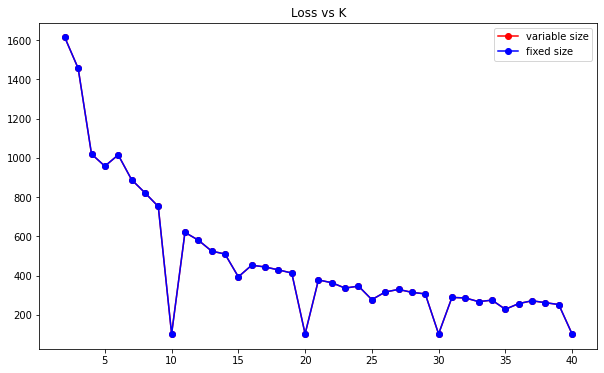

In [10]:
# utils.plot_mse(k_list_variable, mse_variable_size, mse_fixed_size)
utils.plot_loss(k_list_variable, loss_variable_size, loss_fixed_size)

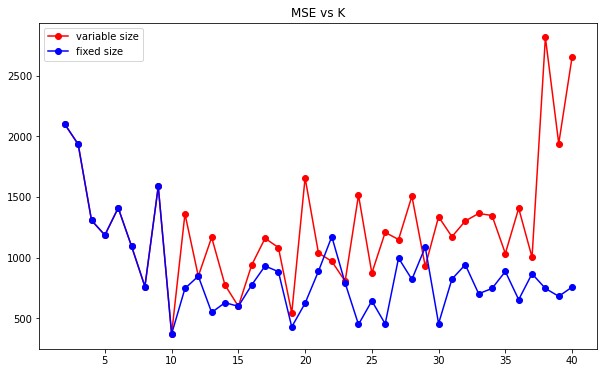

In [49]:
# utils.plot_mse(k_list_variable, mse_variable_size, mse_fixed_size)